<a href="https://colab.research.google.com/github/qkrwoghd04/Cryptography_Implementation/blob/main/code/ddos_detection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics

In [4]:
sdn_data = pd.read_csv( r"./drive/MyDrive/dataset_sdn.csv")

In [5]:
sdn_data

dt  switch        src       dst  pktcount  bytecount  dur  \
0       11425       1   10.0.0.1  10.0.0.8     45304   48294064  100   
1       11605       1   10.0.0.1  10.0.0.8    126395  134737070  280   
2       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
3       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
4       11425       1   10.0.0.2  10.0.0.8     90333   96294978  200   
...       ...     ...        ...       ...       ...        ...  ...   
104340   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104341   5262       3   10.0.0.5  10.0.0.7        79       7742   81   
104342   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104343   5262       3  10.0.0.11  10.0.0.5        31       3038   31   
104344   5262       3  10.0.0.11  10.0.0.5        31       3038   31   

         dur_nsec       tot_dur  flows  ...  pktrate  Pairflow  Protocol  \
0       716000000  1.010000e+11      3  ...      451         0       UDP   
1       734000000  2.810000e+11      2  ...      451         0       UDP   
2       744000000  2.010000e+11      3  ...      451         0       UDP   
3       744000000  2.010000e+11      3  ...      451         0       UDP   
4       744000000  2.010000e+11      3  ...      451         0       UDP   
...           ...           ...    ...  ...      ...       ...       ...   
104340  842000000  8.184200e+10      5  ...        0         0      ICMP   
104341  842000000  8.184200e+10      5  ...        0         0      ICMP   
104342  805000000  3.180500e+10      5  ...        1         0      ICMP   
104343  805000000  3.180500e+10      5  ...        1         0      ICMP   
104344  805000000  3.180500e+10      5  ...        1         0      ICMP   

        port_no   tx_bytes rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0             3  143928631     3917        0      0.0       0.0      0  
1             4       3842     3520        0      0.0       0.0      0  
2             1       3795     1242        0      0.0       0.0      0  
3             2       3688     1492        0      0.0       0.0      0  
4             3       3413     3665        0      0.0       0.0      0  
...         ...        ...      ...      ...      ...       ...    ...  
104340        1      15209    12720        1      1.0       2.0      0  
104341        3      15099    14693        1      1.0       2.0      0  
104342        2       3409     3731        0      0.0       0.0      0  
104343        1      15209    12720        1      1.0       2.0      0  
104344        3      15099    14693        1      1.0       2.0      0  

[104345 rows x 23 columns]

In [6]:
sdn_data.shape

(104345, 23)

In [7]:
sdn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [8]:
sdn_data.describe()

dt         switch       pktcount     bytecount  \
count  104345.000000  104345.000000  104345.000000  1.043450e+05   
mean    17927.514169       4.214260   52860.954746  3.818660e+07   
std     11977.642655       1.956327   52023.241460  4.877748e+07   
min      2488.000000       1.000000       0.000000  0.000000e+00   
25%      7098.000000       3.000000     808.000000  7.957600e+04   
50%     11905.000000       4.000000   42828.000000  6.471930e+06   
75%     29952.000000       5.000000   94796.000000  7.620354e+07   
max     42935.000000      10.000000  260006.000000  1.471280e+08   

                 dur      dur_nsec       tot_dur          flows  \
count  104345.000000  1.043450e+05  1.043450e+05  104345.000000   
mean      321.497398  4.613880e+08  3.218865e+11       5.654234   
std       283.518232  2.770019e+08  2.834029e+11       2.950036   
min         0.000000  0.000000e+00  0.000000e+00       2.000000   
25%       127.000000  2.340000e+08  1.270000e+11       3.000000   
50%       251.000000  4.180000e+08  2.520000e+11       5.000000   
75%       412.000000  7.030000e+08  4.130000e+11       7.000000   
max      1881.000000  9.990000e+08  1.880000e+12      17.000000   

           packetins     pktperflow   byteperflow        pktrate  \
count  104345.000000  104345.000000  1.043450e+05  104345.000000   
mean     5200.383468    6381.715291  4.716150e+06     212.210676   
std      5257.001450    7404.777808  7.560116e+06     246.855123   
min         4.000000 -130933.000000 -1.464426e+08   -4365.000000   
25%      1943.000000      29.000000  2.842000e+03       0.000000   
50%      3024.000000    8305.000000  5.521680e+05     276.000000   
75%      7462.000000   10017.000000  9.728112e+06     333.000000   
max     25224.000000   19190.000000  1.495387e+07     639.000000   

            Pairflow        port_no      tx_bytes      rx_bytes  \
count  104345.000000  104345.000000  1.043450e+05  1.043450e+05   
mean        0.600987       2.331094  9.325264e+07  9.328039e+07   
std         0.489698       1.084333  1.519380e+08  1.330004e+08   
min         0.000000       1.000000  2.527000e+03  8.560000e+02   
25%         0.000000       1.000000  4.743000e+03  3.539000e+03   
50%         1.000000       2.000000  4.219610e+06  1.338339e+07   
75%         1.000000       3.000000  1.356398e+08  1.439277e+08   
max         1.000000       5.000000  1.269982e+09  9.905962e+08   

             tx_kbps        rx_kbps       tot_kbps          label  
count  104345.000000  103839.000000  103839.000000  104345.000000  
mean      998.899756    1003.811420    2007.578742       0.390857  
std      2423.471618    2054.887034    3144.437173       0.487945  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       4.000000       0.000000  
75%       251.000000     557.000000    3838.000000       1.000000  
max     20580.000000   16577.000000   20580.000000       1.000000

In [9]:
sdn_data.label.unique()

array([0, 1])

In [10]:
sdn_data.label.value_counts()

label
0    63561
1    40784
Name: count, dtype: int64

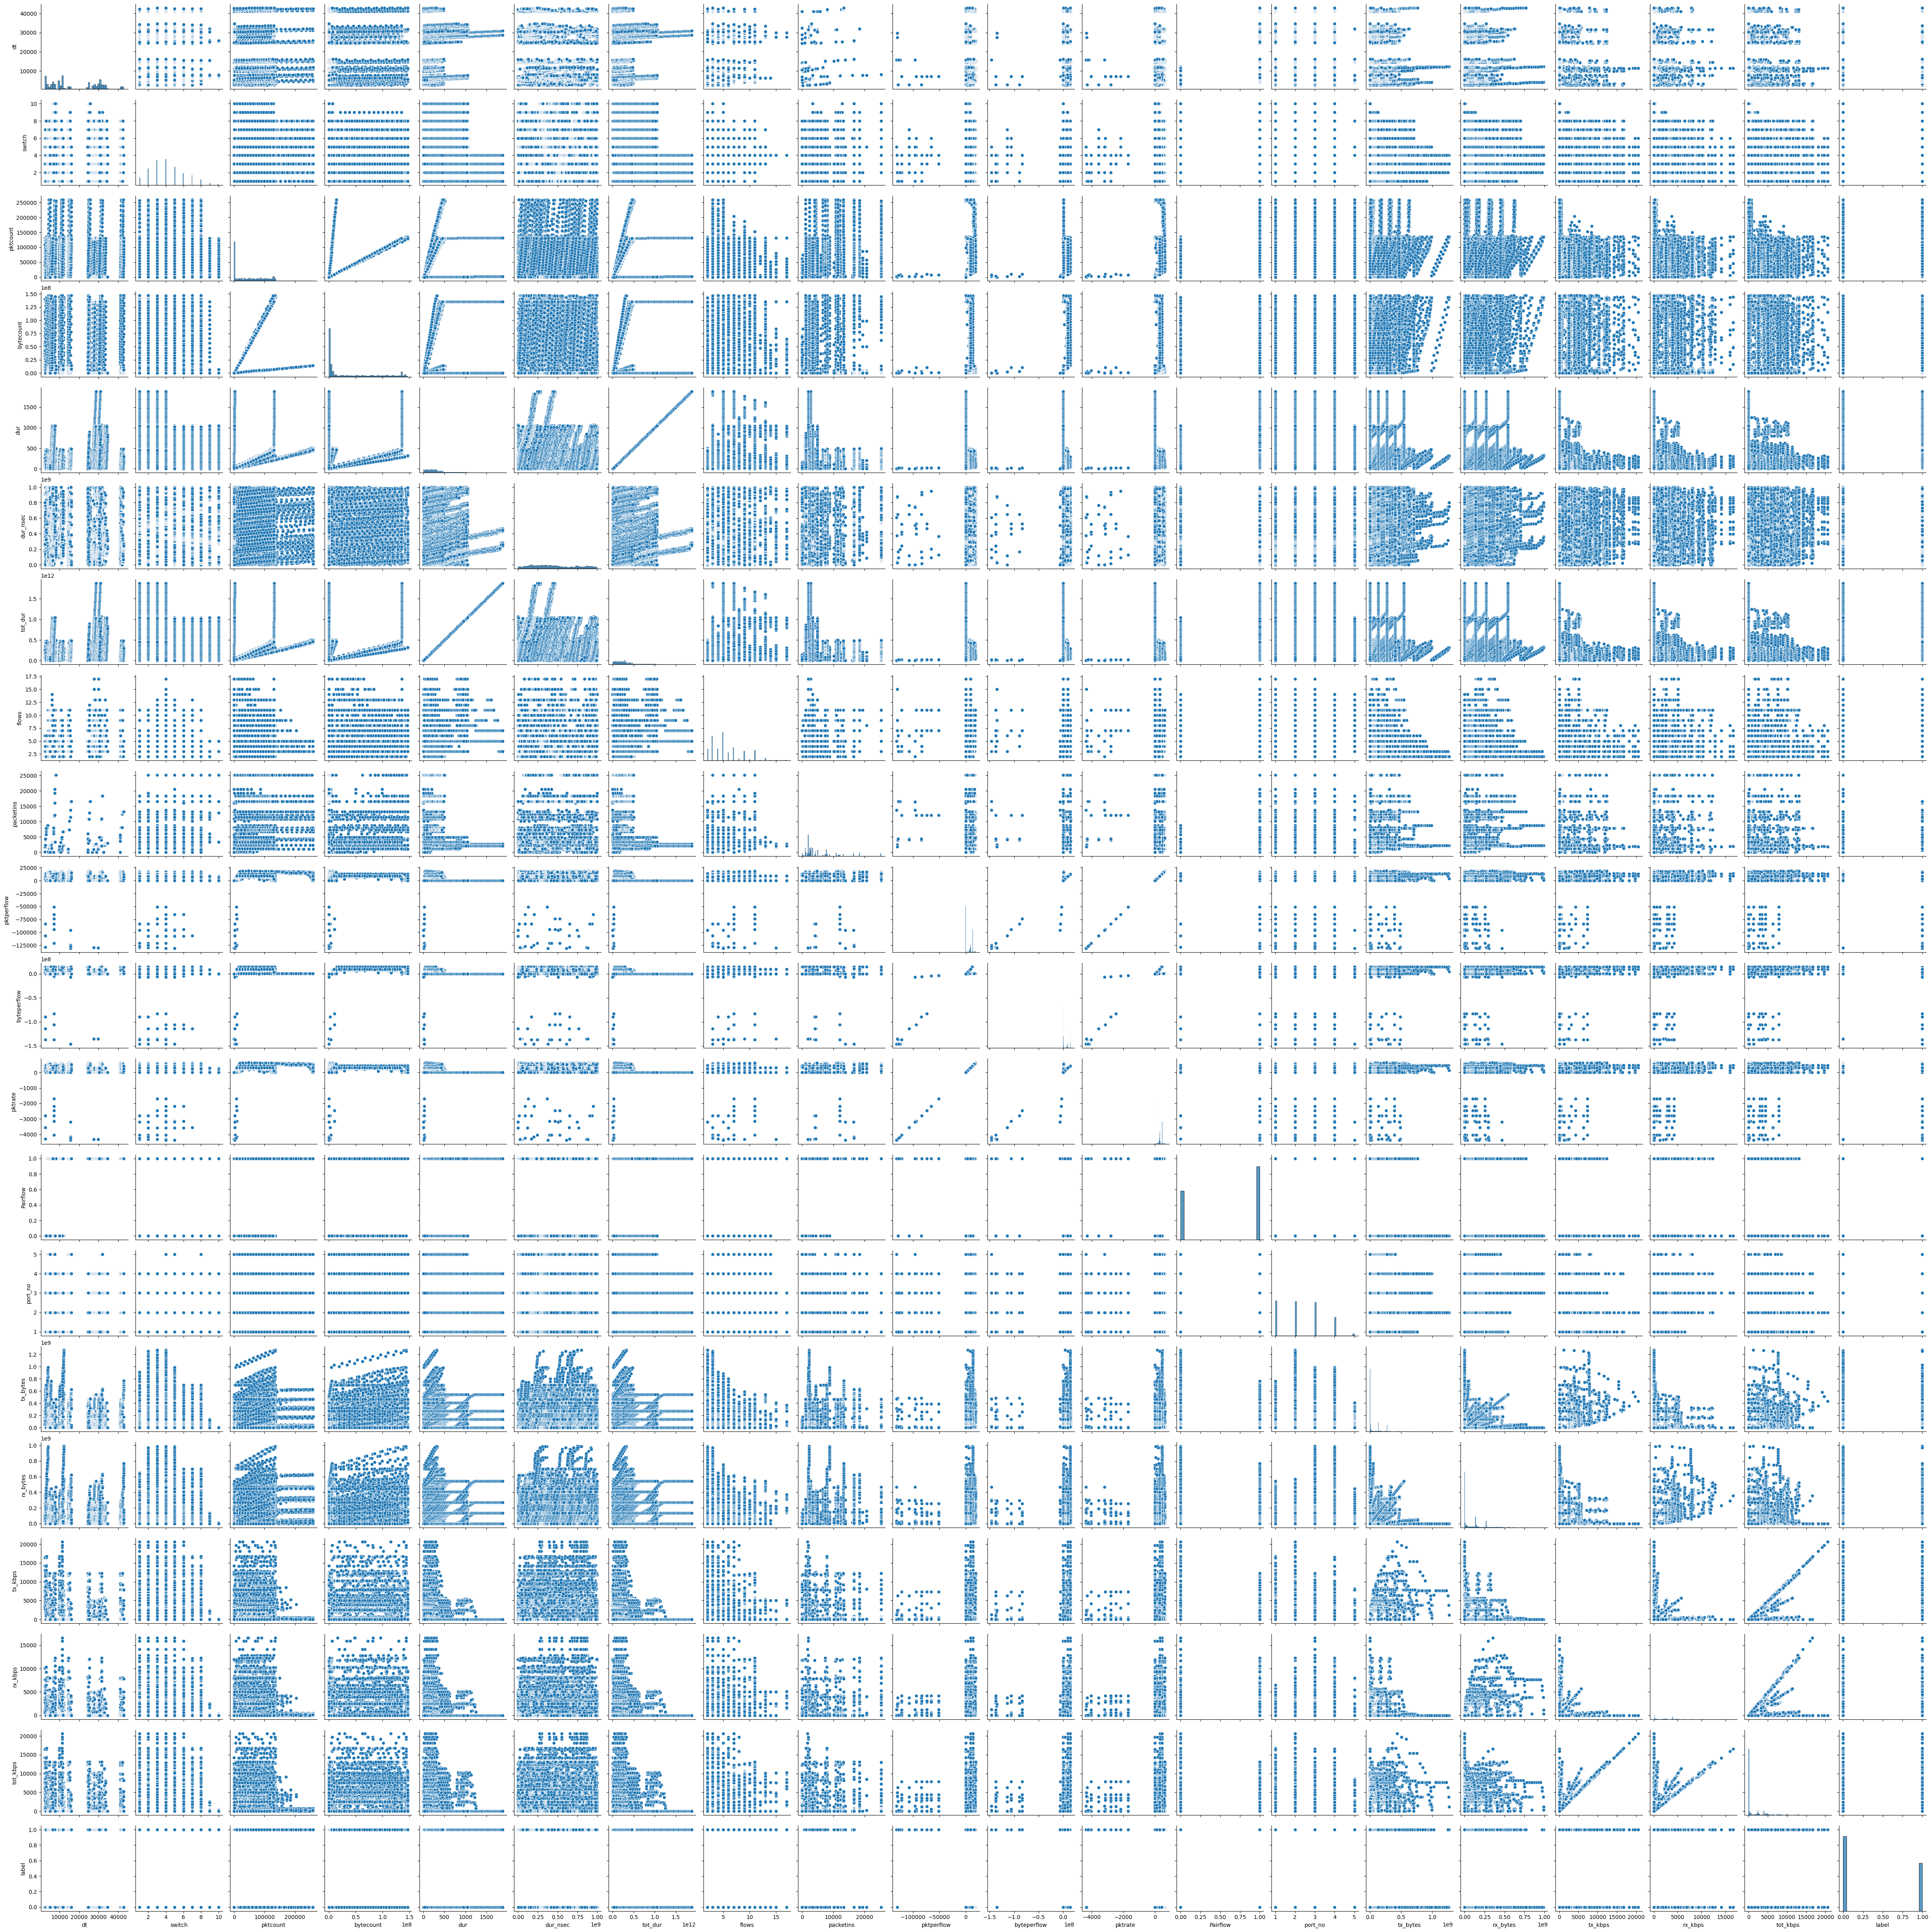

In [11]:
sns.pairplot(sdn_data)

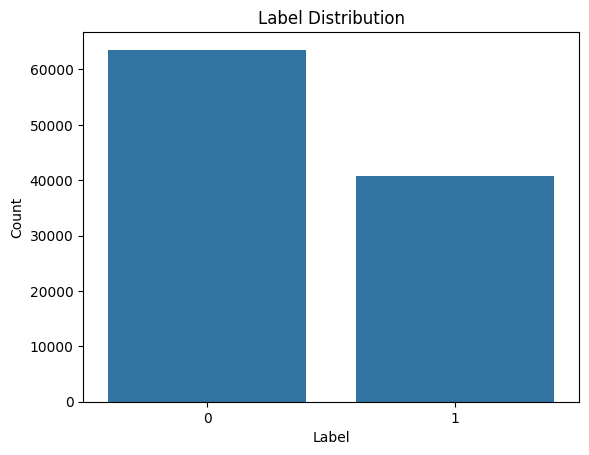

In [12]:
label_counts = sdn_data['label'].value_counts()
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

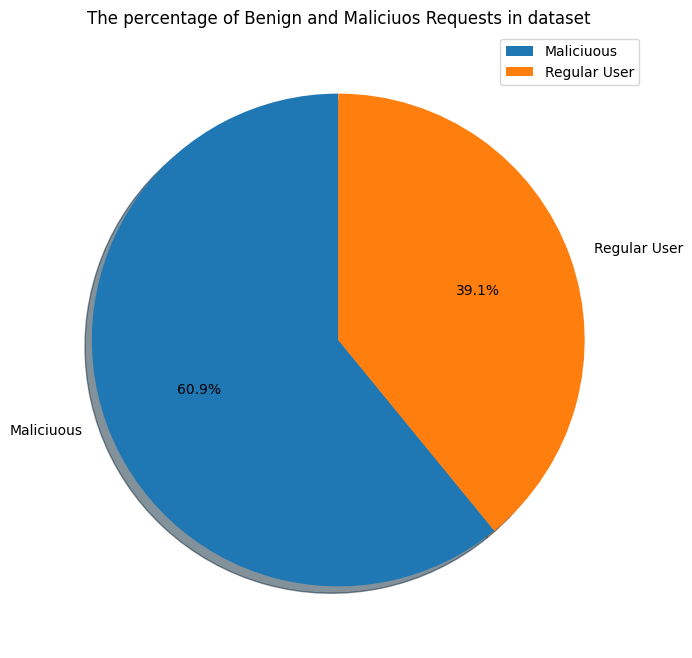

In [13]:
labels = ["Maliciuous",'Regular User']
sizes = [dict(sdn_data.label.value_counts())[0], dict(sdn_data.label.value_counts())[1]]
plt.figure(figsize = (13,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(["Maliciuous", "Regular User"])
plt.title('The percentage of Benign and Maliciuos Requests in dataset')
plt.show()

In [14]:
sdn_data.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [15]:
numeric_df = sdn_data.select_dtypes(include=['int64', 'float64'])
object_df = sdn_data.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Columns: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of Numeric Features:  20
Number of Object Features:  3


In [16]:
numeric_df

dt  switch  pktcount  bytecount  dur   dur_nsec       tot_dur  \
0       11425       1     45304   48294064  100  716000000  1.010000e+11   
1       11605       1    126395  134737070  280  734000000  2.810000e+11   
2       11425       1     90333   96294978  200  744000000  2.010000e+11   
3       11425       1     90333   96294978  200  744000000  2.010000e+11   
4       11425       1     90333   96294978  200  744000000  2.010000e+11   
...       ...     ...       ...        ...  ...        ...           ...   
104340   5262       3        79       7742   81  842000000  8.184200e+10   
104341   5262       3        79       7742   81  842000000  8.184200e+10   
104342   5262       3        31       3038   31  805000000  3.180500e+10   
104343   5262       3        31       3038   31  805000000  3.180500e+10   
104344   5262       3        31       3038   31  805000000  3.180500e+10   

        flows  packetins  pktperflow  byteperflow  pktrate  Pairflow  port_no  \
0           3       1943       13535     14428310      451         0        3   
1           2       1943       13531     14424046      451         0        4   
2           3       1943       13534     14427244      451         0        1   
3           3       1943       13534     14427244      451         0        2   
4           3       1943       13534     14427244      451         0        3   
...       ...        ...         ...          ...      ...       ...      ...   
104340      5         10          29         2842        0         0        1   
104341      5         10          29         2842        0         0        3   
104342      5         10          30         2940        1         0        2   
104343      5         10          30         2940        1         0        1   
104344      5         10          30         2940        1         0        3   

         tx_bytes  rx_bytes  tx_kbps  rx_kbps  tot_kbps  label  
0       143928631      3917        0      0.0       0.0      0  
1            3842      3520        0      0.0       0.0      0  
2            3795      1242        0      0.0       0.0      0  
3            3688      1492        0      0.0       0.0      0  
4            3413      3665        0      0.0       0.0      0  
...           ...       ...      ...      ...       ...    ...  
104340      15209     12720        1      1.0       2.0      0  
104341      15099     14693        1      1.0       2.0      0  
104342       3409      3731        0      0.0       0.0      0  
104343      15209     12720        1      1.0       2.0      0  
104344      15099     14693        1      1.0       2.0      0  

[104345 rows x 20 columns]

In [17]:
object_df

src       dst Protocol
0        10.0.0.1  10.0.0.8      UDP
1        10.0.0.1  10.0.0.8      UDP
2        10.0.0.2  10.0.0.8      UDP
3        10.0.0.2  10.0.0.8      UDP
4        10.0.0.2  10.0.0.8      UDP
...           ...       ...      ...
104340   10.0.0.5  10.0.0.7     ICMP
104341   10.0.0.5  10.0.0.7     ICMP
104342  10.0.0.11  10.0.0.5     ICMP
104343  10.0.0.11  10.0.0.5     ICMP
104344  10.0.0.11  10.0.0.5     ICMP

[104345 rows x 3 columns]

Text(0.5, 1.0, 'Number of requests from different IP adress')

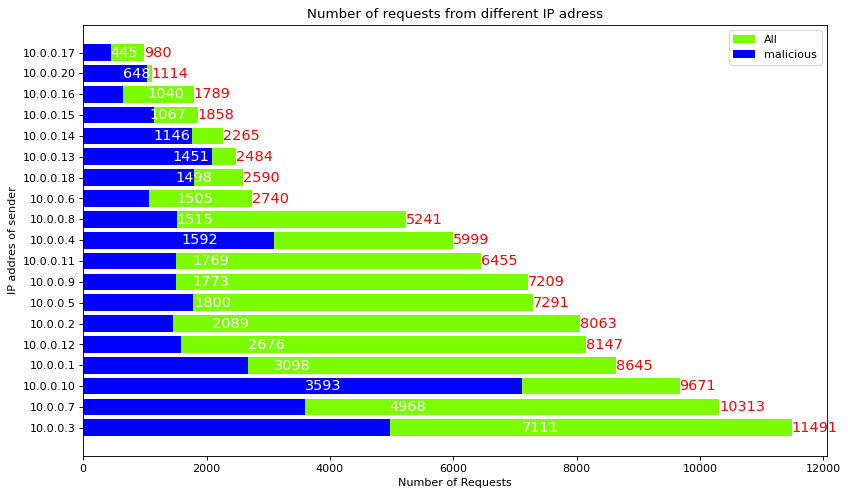

In [18]:
figure(figsize=(12, 7), dpi=80)
plt.barh(list(dict(sdn_data.src.value_counts()).keys()), dict(sdn_data.src.value_counts()).values(), color='lawngreen')
plt.barh(list(dict(sdn_data[sdn_data.label == 1].src.value_counts()).keys()), dict(sdn_data[sdn_data.label == 1].src.value_counts()).values(), color='blue')

for idx, val in enumerate(dict(sdn_data.src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='r', size = 13)

for idx, val in enumerate(dict(sdn_data[sdn_data.label == 1].src.value_counts()).values()):
    plt.text(x = val, y = idx-0.2, s = str(val), color='w', size = 13)


plt.xlabel('Number of Requests')
plt.ylabel('IP addres of sender')
plt.legend(['All','malicious'])
plt.title('Number of requests from different IP adress')

Text(0.5, 1.0, 'The number of requests from different protocols')

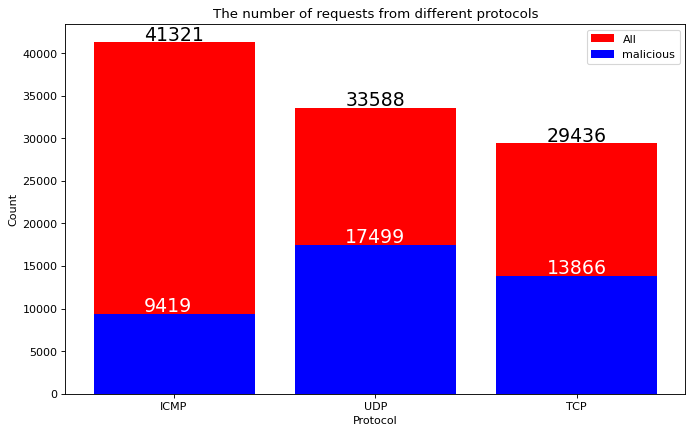

In [19]:
figure(figsize=(10, 6), dpi=80)
plt.bar(list(dict(sdn_data.Protocol.value_counts()).keys()), dict(sdn_data.Protocol.value_counts()).values(), color='r')
plt.bar(list(dict(sdn_data[sdn_data.label == 1].Protocol.value_counts()).keys()), dict(sdn_data[sdn_data.label == 1].Protocol.value_counts()).values(), color='b')

plt.text(x = 0 - 0.15, y = 41321 + 200, s = str(41321), color='black', size=17)
plt.text(x = 1 - 0.15, y = 33588 + 200, s = str(33588), color='black', size=17)
plt.text(x = 2 - 0.15, y = 29436 + 200, s = str(29436), color='black', size=17)

plt.text(x = 0 - 0.15, y = 9419 + 200, s = str(9419), color='w', size=17)
plt.text(x = 1 - 0.15, y = 17499 + 200, s = str(17499), color='w', size=17)
plt.text(x = 2 - 0.15, y = 13866 + 200, s = str(13866), color='w', size=17)

plt.xlabel('Protocol')
plt.ylabel('Count')
plt.legend(['All', 'malicious'])
plt.title('The number of requests from different protocols')

In [20]:
df = sdn_data.copy()

In [21]:
class Model:
    global y

    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

        self.accuracy_lr = 0
        self.accuracy_svm = 0
        self.accuracy_rf = 0
        self.accuracy_gbc = 0

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)

            results_lr.append({'solver': solver, 'accuracy': f"{round(accuracy_lr * 100, 2)}%",
                               'Coefficients': {'W': LR.coef_, 'b': LR.intercept_}})

            accuracy_list.append(accuracy_lr)

        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train, self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print(f"Accuracy of LR model is: {round(accuracy_lr * 100, 2)}%", '\n')
        print("########################################################################")
        print('Best solver is:', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- time for LogisticRegression" % (time.time() - start_time))
        self.accuracy_lr = accuracy_lr

    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']

        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"kernel": kernel, "accuracy": f"{round(accuracy_svm * 100, 2)}%"})
            print("Accuracy: %.2f%%" % round((accuracy_svm * 100.0), 2))
            print('######################################################################')
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"Accuracy of SVM model {round(accuracy_svm, 2) * 100}%", '\n')
        print("########################################################################")
        print('Best kernel is:', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_svm = accuracy_svm

    def RandomForest(self):
        start_time = time.time()

        param_grid = {
    'n_estimators': [100, 200, 500],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 3, 4, 5, 6]  # Include 'None' for unlimited depth
}


        rf_base = RandomForestClassifier(criterion='gini',
                                      oob_score=True,
                                      random_state=1,
                                      n_jobs=-1)

        rf_search = GridSearchCV(rf_base, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
        rf_search.fit(self.X_train, self.y_train)

        best_rf = rf_search.best_estimator_
        predicted_rf = best_rf.predict(self.X_test)
        accuracy_rf = accuracy_score(self.y_test, predicted_rf)

        print(f"Accuracy of RF model is: {round(accuracy_rf * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_rf = accuracy_rf

    def GradientBoost(self):
        start_time = time.time()
        gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)
        gbc.fit(self.X_train, self.y_train)

        predicted_gbc = gbc.predict(self.X_test)
        accuracy_gbc = accuracy_score(self.y_test, predicted_gbc)
        print(f"Accuracy of Gradient Boosting model is: {round(accuracy_gbc * 100, 2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_gbc, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        self.accuracy_gbc = accuracy_gbc

    def plot_accuracy(self, accuracies, model_names):
        plt.figure(figsize=(10, 6))
        plt.bar(model_names, accuracies, color='blue')
        plt.xlabel('Model')
        plt.ylabel('Accuracy')
        plt.title('Accuracy of Different Models')
        plt.ylim(0, 100)  # Set y-axis limit to be between 0 and 100 (percentage)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def run_models(self):
        self.LogisticRegression()
        self.SupportVectorMachine()
        self.RandomForest()
        self.GradientBoost()

        model_names = ['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Gradient Boosting']
        accuracies = [self.accuracy_lr * 100, self.accuracy_svm * 100, self.accuracy_rf * 100, self.accuracy_gbc * 100]

        self.plot_accuracy(accuracies, model_names)

In [22]:
df = df.dropna()

In [23]:
X = df.drop(['dt','src','dst','label','Protocol'], axis=1)
y = df.label

In [24]:
X.head()

switch  pktcount  bytecount  dur   dur_nsec       tot_dur  flows  \
0       1     45304   48294064  100  716000000  1.010000e+11      3   
1       1    126395  134737070  280  734000000  2.810000e+11      2   
2       1     90333   96294978  200  744000000  2.010000e+11      3   
3       1     90333   96294978  200  744000000  2.010000e+11      3   
4       1     90333   96294978  200  744000000  2.010000e+11      3   

   packetins  pktperflow  byteperflow  pktrate  Pairflow  port_no   tx_bytes  \
0       1943       13535     14428310      451         0        3  143928631   
1       1943       13531     14424046      451         0        4       3842   
2       1943       13534     14427244      451         0        1       3795   
3       1943       13534     14427244      451         0        2       3688   
4       1943       13534     14427244      451         0        3       3413   

   rx_bytes  tx_kbps  rx_kbps  tot_kbps  
0      3917        0      0.0       0.0  
1      3520        0      0.0       0.0  
2      1242        0      0.0       0.0  
3      1492        0      0.0       0.0  
4      3665        0      0.0       0.0

In [25]:
abs(X.corr())

switch  pktcount  bytecount       dur  dur_nsec   tot_dur  \
switch       1.000000  0.057639   0.168475  0.023560  0.077123  0.023687   
pktcount     0.057639  1.000000   0.675792  0.023222  0.034283  0.023283   
bytecount    0.168475  0.675792   1.000000  0.038033  0.029418  0.038034   
dur          0.023560  0.023222   0.038033  1.000000  0.056219  0.999998   
dur_nsec     0.077123  0.034283   0.029418  0.056219  1.000000  0.054854   
tot_dur      0.023687  0.023283   0.038034  0.999998  0.054854  1.000000   
flows        0.028017  0.257467   0.244514  0.176351  0.010445  0.176352   
packetins    0.199984  0.275867   0.124840  0.124797  0.059464  0.124876   
pktperflow   0.036071  0.470065   0.333530  0.329504  0.043277  0.329483   
byteperflow  0.112878  0.290614   0.533201  0.259843  0.047295  0.259831   
pktrate      0.036079  0.470097   0.333553  0.329764  0.043279  0.329744   
Pairflow     0.090657  0.085007   0.388628  0.180537  0.211168  0.180285   
port_no      0.006854  0.006073   0.008322  0.002026  0.020864  0.001988   
tx_bytes     0.050625  0.025893   0.007110  0.154209  0.007767  0.154251   
rx_bytes     0.058007  0.029731   0.008339  0.176115  0.008926  0.176162   
tx_kbps      0.032980  0.001984   0.049803  0.141224  0.035533  0.141305   
rx_kbps      0.039025  0.002328   0.058850  0.166916  0.042023  0.167011   
tot_kbps     0.050972  0.003054   0.076920  0.218143  0.054903  0.218268   

                flows  packetins  pktperflow  byteperflow   pktrate  Pairflow  \
switch       0.028017   0.199984    0.036071     0.112878  0.036079  0.090657   
pktcount     0.257467   0.275867    0.470065     0.290614  0.470097  0.085007   
bytecount    0.244514   0.124840    0.333530     0.533201  0.333553  0.388628   
dur          0.176351   0.124797    0.329504     0.259843  0.329764  0.180537   
dur_nsec     0.010445   0.059464    0.043277     0.047295  0.043279  0.211168   
tot_dur      0.176352   0.124876    0.329483     0.259831  0.329744  0.180285   
flows        1.000000   0.047415    0.212795     0.246311  0.212924  0.390747   
packetins    0.047415   1.000000    0.185407     0.106459  0.185469  0.269968   
pktperflow   0.212795   0.185407    1.000000     0.812940  0.999999  0.171700   
byteperflow  0.246311   0.106459    0.812940     1.000000  0.812940  0.396559   
pktrate      0.212924   0.185469    0.999999     0.812940  1.000000  0.171783   
Pairflow     0.390747   0.269968    0.171700     0.396559  0.171783  1.000000   
port_no      0.029236   0.000787    0.004801     0.005831  0.004802  0.022703   
tx_bytes     0.165628   0.108195    0.053207     0.059418  0.053265  0.091515   
rx_bytes     0.189312   0.124032    0.060848     0.067954  0.060914  0.104517   
tx_kbps      0.155590   0.037910    0.105162     0.097287  0.105191  0.007350   
rx_kbps      0.183821   0.044762    0.124257     0.114963  0.124291  0.008644   
tot_kbps     0.240285   0.058529    0.162416     0.150260  0.162461  0.011325   

              port_no  tx_bytes  rx_bytes   tx_kbps   rx_kbps  tot_kbps  
switch       0.006854  0.050625  0.058007  0.032980  0.039025  0.050972  
pktcount     0.006073  0.025893  0.029731  0.001984  0.002328  0.003054  
bytecount    0.008322  0.007110  0.008339  0.049803  0.058850  0.076920  
dur          0.002026  0.154209  0.176115  0.141224  0.166916  0.218143  
dur_nsec     0.020864  0.007767  0.008926  0.035533  0.042023  0.054903  
tot_dur      0.001988  0.154251  0.176162  0.141305  0.167011  0.218268  
flows        0.029236  0.165628  0.189312  0.155590  0.183821  0.240285  
packetins    0.000787  0.108195  0.124032  0.037910  0.044762  0.058529  
pktperflow   0.004801  0.053207  0.060848  0.105162  0.124257  0.162416  
byteperflow  0.005831  0.059418  0.067954  0.097287  0.114963  0.150260  
pktrate      0.004802  0.053265  0.060914  0.105191  0.124291  0.162461  
Pairflow     0.022703  0.091515  0.104517  0.007350  0.008644  0.011325  
port_no      1.000000  0.089368  0.222514  0.067594  0.160487  0.157

<Axes: >

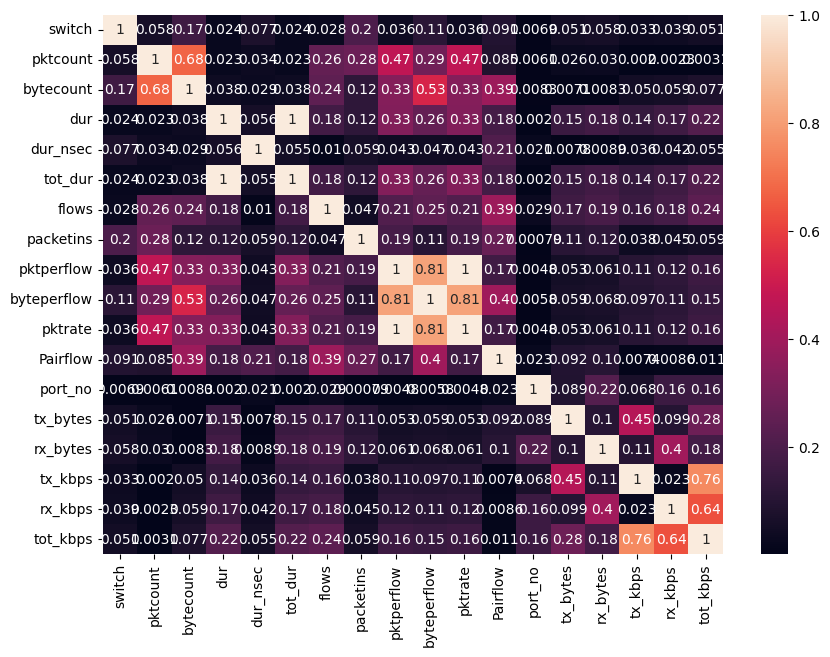

In [26]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(abs(X.corr()), annot=True)

In [27]:
X = pd.get_dummies(X)

In [28]:
M = Model(X)

Accuracy of LR model is: 75.15% 

########################################################################
Best solver is: newton-cg
########################################################################
              precision    recall  f1-score   support

           0       0.83      0.78      0.80     20292
           1       0.63      0.70      0.66     10860

    accuracy                           0.75     31152
   macro avg       0.73      0.74      0.73     31152
weighted avg       0.76      0.75      0.75     31152
 

########################################################################
--- 3.304293155670166 seconds --- time for LogisticRegression
Accuracy: 75.23%
######################################################################
Accuracy: 95.89%
######################################################################
Accuracy: 96.76%
######################################################################
Accuracy: 56.07%
#################################################

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy of RF model is: 100.0% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18986
           1       1.00      1.00      1.00     12166

    accuracy                           1.00     31152
   macro avg       1.00      1.00      1.00     31152
weighted avg       1.00      1.00      1.00     31152

########################################################################
--- 1926.8425142765045 seconds ---
Accuracy of Gradient Boosting model is: 99.55% 

########################################################################
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18901
           1       1.00      0.99      0.99     12251

    accuracy                           1.00     31152
   macro avg       1.00      0.99      1.00     31152
weighted avg       1.00      1.00      1.00     31152

#########

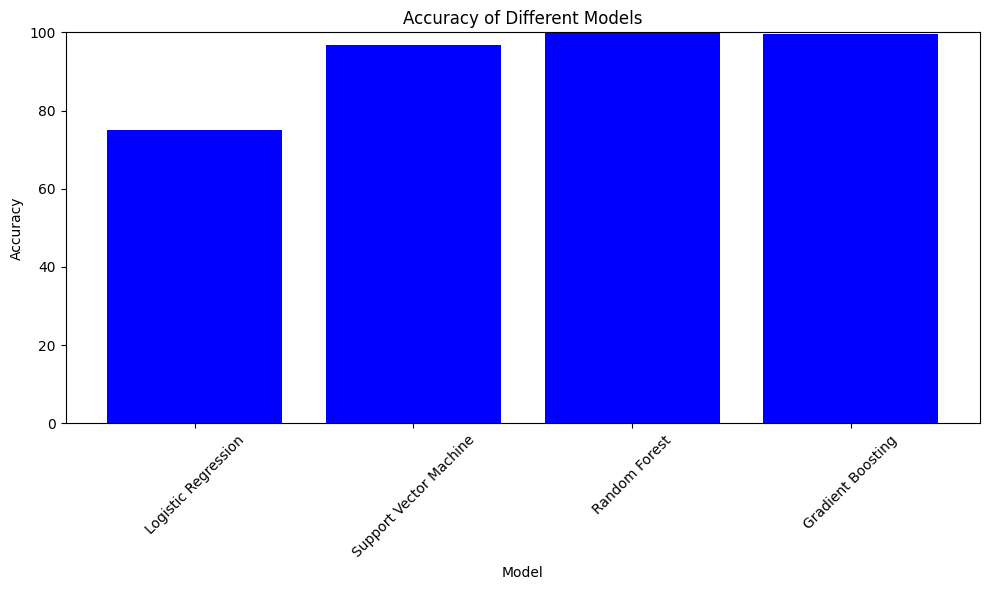

In [29]:
M.run_models()